# Data Mining: Bonus task

**Parth Kalkar**, *p.kalkar@innopolis.university*

In this notebook, we train a model to solve the binary classification task based on the given scoring dataset.

    For modeling, we have used a `Logistic Regression`,'Gradient Boosting' and Xtreme Gradient Boosting classifier. 

## Installing libraries

In [ ]:
#!pip install pandas sklearn xlrd seaborn

## Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:/Users/Waqas Qazi/Downloads/Machine Learning datasets/scoring.xls")# Data loading

df

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0
5,1,0.24,3,0.10320,1,0,1,2,0.34,1,...,1,1,1,0,1,0,0,0,furniture,0
6,1,0.09,4,0.07505,1,4,1,3,0.34,2,...,1,1,1,0,0,1,0,0,education,0
7,-1,0.12,2,0.04500,0,2,1,2,0.23,1,...,1,0,1,0,0,1,0,1,car_new,0
8,1,0.36,3,0.40430,2,4,1,4,0.42,4,...,1,1,1,0,0,1,0,1,car_new,0
9,-1,0.42,3,0.21850,1,3,1,2,0.26,2,...,2,1,1,0,1,0,0,1,television,0


## Understanding the dataset

Here we checked the columns and their correlations

In [ ]:
print(df.columns)

Index(['account', 'duration', 'credit_history', 'amount', 'savings',
       'employment', 'guarantors', 'residence', 'age', 'credits_number', 'job',
       'maintenance_people', 'telephone', 'foreign', 'real_estate',
       'life_insurance', 'car', 'housing_rent', 'sex', 'purpose', 'target'],
      dtype='object')


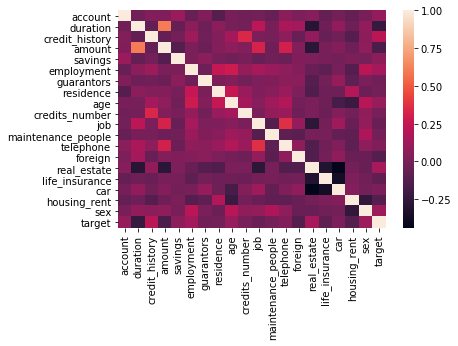

In [ ]:
import seaborn as sns
%matplotlib inline

corr=df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Preparing data for model training

Here we do 2 things:
1. Performing the label encoding
2. Split the data into feature and target, then split both into training and testing sets.

In [ ]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder()
d = df.select_dtypes(include=['object'])
for i in d.columns:
    df[i]=label_enco.fit_transform(df[i])

In [ ]:
# Split into features and target, and into train and test
from sklearn.model_selection import train_test_split

seed = 23
x = df.loc[:, df.columns!="target"]
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)

## Training models

Here we train a Logistic Regression, Gradient Boosting and Xtreme Gradient Boosting

## Logistic Regression
The below cell shows the code of Logistic Regression

Accuracy:  0.7
Confusion Matrix:
[[21 11]
 [ 7 21]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.66      0.75      0.70        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.71      0.70      0.70        60



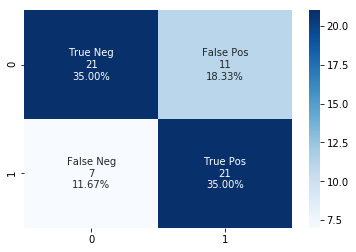

In [ ]:
from sklearn.linear_model import LogisticRegression#Importing LogisticRegression from scikit
from sklearn.metrics import confusion_matrix #Importing confusion_matrix Library from scikit to evaluation of model
from sklearn import metrics #Importing metrics from scikit to evaluate the performance of model
LR = LogisticRegression(C=0.89, solver='lbfgs').fit(x_train, y_train)# Training LogisticRegression on train data set 
yhat = LR.predict(x_test) # Performing the prediction on test dataset
print("Accuracy: ", metrics.accuracy_score(y_test, yhat))#Calculating the accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, yhat))#Calculating the confusion_matrix
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, yhat))#Calculating the classification_report
#Drawing the confusion metrics
cf_matrix=confusion_matrix(y_test, yhat)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

**GradientBoostingClassifier**

Confusion Matrix:
[[29  3]
 [ 7 21]]
Accuracy:  0.8333333333333334
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



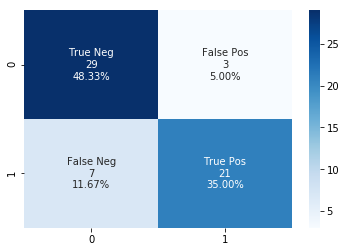

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier#Importing GradientBoostingClassifier from scikit
gb_clf1 = GradientBoostingClassifier(n_estimators=45, learning_rate=0.5, max_features=2, max_depth=7, random_state=0)# Intailizaing the paarmeter of GB
gb_clf1.fit(x_train, y_train)# Training LogisticRegression on train data set 
predictions = gb_clf1.predict(x_test)# Performing the prediction on test dataset

print("Confusion Matrix:")                        
print(confusion_matrix(y_test, predictions))#Calculating the confusion_matrix
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))#Calculating the accuracy

print("Classification Report")
print(classification_report(y_test, predictions))#Calculating the classification_report
#Drawing the confusion metrics
cf_matrix=confusion_matrix(y_test, predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

**XGBClassifier**

C:\Users\Waqas Qazi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8
Confusion Matrix:
[[24  8]
 [ 4 24]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.75      0.86      0.80        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



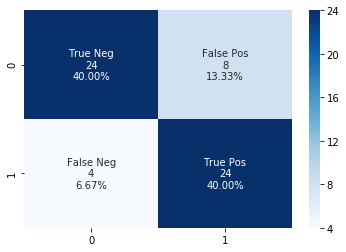

In [ ]:
from xgboost import XGBClassifier#Importing XGBClassifier from xgboost module
clf=XGBClassifier(n_estimators=50)# Training XGBClassifier on train data set
clf.fit(x_train, y_train)# Training XGBClassifier on train data set

yhat4=clf.predict(x_test)# Performing the prediction on test dataset
print("Accuracy:",metrics.accuracy_score(y_test, yhat4))#Calculating the Accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, yhat4))#Calculating the confusion_matrix

print("Classification Report")
print(classification_report(y_test, yhat4))#Calculating the Classification Report
#Drawing the confusion metrics
cf_matrix=confusion_matrix(y_test, yhat4)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')